In [1]:
#install mysql connector
!pip install mysql-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.1/390.1 kB 6.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.8/982.8 kB 9.1 MB/s eta 0:00:0000:0100:01


In [291]:
#install folium
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 510.8 kB/s eta 0:00:00a 0:00:01


In [294]:
#install geopy
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.2 MB/s eta 0:00:00


In [460]:
#connecting to mysql server
import mysql.connector

host = 'localhost'
user = 'root'
password = 'dats6102'
database = 'zomato'

# Create a connection object
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

In [440]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [441]:
df_restaurant = pd.read_sql('SELECT * FROM restaurant_details', con=db)

In [428]:
#checking if dataset is loaded
df_restaurant.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,price_range
0,53,Amber,1,New Delhi,"N-19, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.220891,28.630197,"North Indian, Chinese, Mughlai",1800,Indian Rupees(Rs.),3
1,55,Berco's,1,New Delhi,"G-2/43, Middle Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.217298,28.632452,"Chinese, Thai",1100,Indian Rupees(Rs.),3
2,60,Colonel's Kababz,1,New Delhi,"29, Defence Colony Market, Defence Colony, New...",Defence Colony,"Defence Colony, New Delhi",77.230591,28.574036,"North Indian, Mughlai",900,Indian Rupees(Rs.),2
3,64,Diva - The Italian Restaurant,1,New Delhi,"M-8A, M Block Market, Greater Kailash (GK) 2, ...",Greater Kailash (GK) 2,"Greater Kailash (GK) 2, New Delhi",77.243186,28.534202,Italian,2500,Indian Rupees(Rs.),4
4,65,Drums of Heaven,1,New Delhi,"S-14, Green Park Extension, Green Park, New Delhi",Green Park,"Green Park, New Delhi",77.205934,28.558018,"Chinese, Seafood, Thai",1800,Indian Rupees(Rs.),3


In [400]:
#checking missing values
df.isnull().sum()

restaurant_id           0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
dtype: int64

In [401]:
#checking if dataset is loaded
df2 = pd.read_sql("select * from ratings",db)
df2

/Users/reema/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,restaurant_id,aggregate_rating,rating_color,rating_text,votes
0,53,2.6,Orange,Average,152
1,55,3.9,Yellow,Good,2639
2,60,3.2,Orange,Average,600
3,64,3.8,Yellow,Good,372
4,65,3.5,Yellow,Good,234
...,...,...,...,...,...
9546,18499493,0.0,White,Not rated,0
9547,18500618,0.0,White,Not rated,1
9548,18500628,0.0,White,Not rated,3
9549,18500639,0.0,White,Not rated,0


### **Number of zomato registered restaurants in each country**

In [6]:
#querying to get the top 5 countries where zomato is highly used
df = pd.read_sql("""SELECT cc.country, COUNT(rd.restaurant_id) AS num_restaurants
                      FROM restaurant_details rd
                      JOIN country_codes cc ON rd.country_code = cc.country_code
                      GROUP BY cc.country
                      ORDER BY num_restaurants DESC LIMIT 5;
                  """,db)
df

/Users/reema/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,num_restaurants
0,India,8652
1,United States,434
2,United Kingdom,80
3,UAE,60
4,Brazil,60


Text(0.5, 1.0, 'Zomato popularity across different countries')

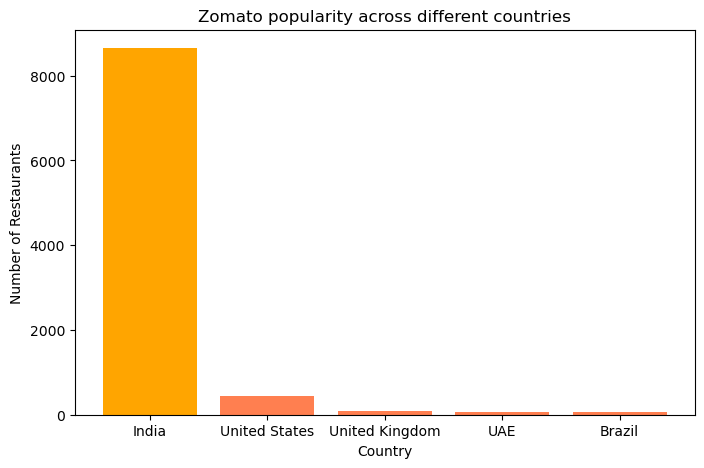

In [65]:
#plotting zomato's popularity among 5 countries

fig, ax = plt.subplots(figsize=(8, 5))  
colors = ['orange' if c == a_df.iloc[0]['country'] else 'coral' for c in a_df['country']]
ax.bar(a_df['country'], a_df['num_restaurants'], color=colors)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Zomato popularity across different countries')


### Rated restaurants and Non-rated restaurants across countries


/Users/reema/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


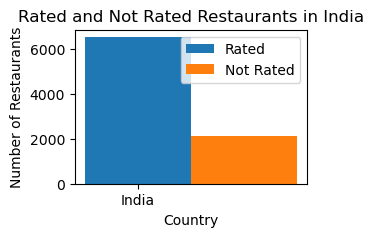

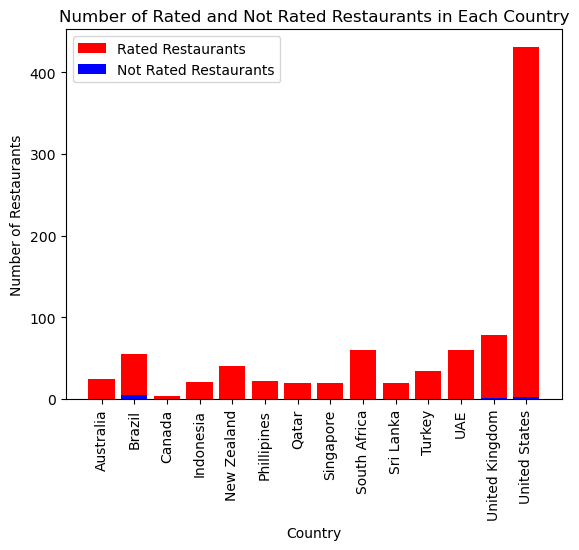

,country,total_restaurants,not_rated,rated
1,Australia,24,0.0,24.0
2,Brazil,60,5.0,55.0
3,Canada,4,0.0,4.0
4,Indonesia,21,0.0,21.0
5,New Zealand,40,0.0,40.0
6,Phillipines,22,0.0,22.0
7,Qatar,20,0.0,20.0
8,Singapore,20,0.0,20.0
9,South Africa,60,0.0,60.0
10,Sri Lanka,20,0.0,20.0


In [151]:
#rated and not rated restaurants in each country

query = """
SELECT country, 
       COUNT(*) as total_restaurants, 
       SUM(CASE WHEN aggregate_rating = 0.0 THEN 1 ELSE 0 END) as not_rated, 
       SUM(CASE WHEN aggregate_rating > 0.0 THEN 1 ELSE 0 END) as rated 
FROM restaurant_details 
JOIN country_codes ON restaurant_details.country_code = country_codes.country_code 
LEFT JOIN ratings ON restaurant_details.restaurant_id = ratings.restaurant_id 
GROUP BY country
"""
a_df = pd.read_sql(query, db) #analysis_dataframe

df_india = pd.DataFrame(a_df.loc[0]).transpose() #displaying seperate graph for india restaurants as it has high number.
df_india.drop('total_restaurants',axis=1,inplace=True)
a_df.drop(0,axis=0,inplace=True)



fig, ax = plt.subplots(figsize=(3,2))


x_pos = np.arange(len(df_india)) # displaying bar graph for indian restaurants
rated_bars = ax.bar(x_pos, df_india['rated'], bar_width, label='Rated')
not_rated_bars = ax.bar(x_pos + bar_width, df_india['not_rated'], bar_width, label='Not Rated')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_india['country'])
ax.legend()

# add axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Rated and Not Rated Restaurants in India')

# show the plot
plt.show()



# Create a bar chart
#plot for other countries

plt.bar(a_df['country'], a_df['rated'], color='red', label='Rated Restaurants')
plt.bar(a_df['country'], a_df['not_rated'], color='blue', label='Not Rated Restaurants')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.title('Number of Rated and Not Rated Restaurants in Each Country')
plt.legend()
plt.show()

#display
a_df

### Average ratings of restaurants in each country

In [255]:
#Average rating of each country
query = """
SELECT c.country, AVG(ra.aggregate_rating) AS avg_rating
FROM country_codes c
JOIN restaurant_details rd ON c.country_code = rd.country_code
JOIN ratings ra ON rd.restaurant_id = ra.restaurant_id
WHERE ra.aggregate_rating > 0.0
GROUP BY c.country;
"""
avg_country_df = pd.read_sql(query,db)
avg_country_df

,country,avg_rating
0,India,3.352034
1,South Africa,4.210000
2,UAE,4.233333
3,Sri Lanka,3.870000
4,Turkey,4.300000
5,United Kingdom,4.139241
6,Qatar,4.060000
7,Phillipines,4.468182
8,Brazil,4.105455
9,New Zealand,4.262500


### Locating Top rated cuisine and their average rating and average number of votes for each country

In [445]:
query="""
SELECT c.country, rd.cuisines, AVG(ra.aggregate_rating) AS avg_rating, AVG(votes) AS avg_votes
FROM country_codes c
JOIN restaurant_details rd ON c.country_code = rd.country_code
JOIN ratings ra ON rd.restaurant_id = ra.restaurant_id
GROUP BY c.country, rd.cuisines
HAVING AVG(ra.aggregate_rating) = (
  SELECT MAX(avg_rating)
  FROM (
  SELECT AVG(ra1.aggregate_rating) AS avg_rating
  FROM country_codes c1
  JOIN restaurant_details rd1 ON c1.country_code = rd1.country_code
  JOIN ratings ra1 ON rd1.restaurant_id = ra1.restaurant_id
  GROUP BY c1.country, rd1.cuisines
  )sub
  )
"""

df_temp = pd.read_sql(query,db)
df_cuisine = df_temp.drop_duplicates(subset='country', keep='first')
df_cuisine

,country,cuisines,avg_rating,avg_votes
0,India,"Mughlai, Lucknowi",4.9,1057.0
3,Indonesia,"Sunda, Indonesian",4.9,1838.0
5,New Zealand,Desserts,4.9,517.5
6,Phillipines,"European, Asian, Indian",4.9,621.0
8,Qatar,Chinese,4.9,182.0
9,South Africa,French,4.9,85.0
12,Sri Lanka,Seafood,4.9,203.0
13,Turkey,Bar Food,4.9,522.0
15,UAE,"Continental, Indian",4.9,641.0
16,United Kingdom,Steak,4.9,309.0


In [446]:
# display a map to show top rated cuisine from each country, average rating and average number of votes

from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my-app")

# Define a function to get the latitude and longitude values for a given country name
def get_lat_long(country_name):
    location = geolocator.geocode(country_name)
    return location.latitude, location.longitude

# Create a new dataframe with country names and their corresponding latitude and longitude values
country_names = df_cuisine['country']
latitudes = []
longitudes = []
for country in country_names:
    lat, long = get_lat_long(country)
    latitudes.append(lat)
    longitudes.append(long)
df_cuisine['Latitude'] = latitudes
df_cuisine['longitudes'] = longitudes

/var/folders/15/bnqnhs9d2fl__lnh_m4sqpm40000gn/T/ipykernel_906/4136782144.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuisine['Latitude'] = latitudes
/var/folders/15/bnqnhs9d2fl__lnh_m4sqpm40000gn/T/ipykernel_906/4136782144.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuisine['longitudes'] = longitudes


In [447]:
#Script to show top cuisine, average rating, average number of votes on the map for each country
import folium

m = folium.Map(location=[51.5074, -0.1278], zoom_start=2, max_bounds=True)


# loop through dataframe and add markers to map
for index, row in df_cuisine.iterrows():
    location = row['country']
    popup = 'Cuisines: {}<br>Average Rating: {}<br>Average Votes: {}'.format(row['cuisines'], row['avg_rating'], row['avg_votes'])
    marker = folium.Marker(location=[row['Latitude'], row['longitudes']], popup=popup)
    marker.add_to(m)
    
m
print("This image is named as fig1.png and will be found in the respository.")

### Total number of restaurants offering online deliveries in each country

In [157]:
#no_of_restaurants that have online deliveries in each country.
query = """
SELECT c.country, f.has_online_delivery, COUNT(r.restaurant_id) AS no_of_restaurants
FROM restaurant_details r
JOIN country_codes c ON r.country_code = c.country_code
JOIN features f ON r.restaurant_id = f.restaurant_id
WHERE f.has_online_delivery = 'Yes'
GROUP BY c.country
"""
yes_df = pd.read_sql(query, db)
yes_df

/Users/reema/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,has_online_delivery,no_of_restaurants
0,UAE,Yes,28
1,India,Yes,2423


### Total number of restaurants not offering online deliveries in each country

In [158]:
#no_of_restaurants that do not have online deliveries in each country.
query = """
SELECT c.country, f.has_online_delivery, COUNT(r.restaurant_id) AS no_of_restaurants
FROM restaurant_details r
JOIN country_codes c ON r.country_code = c.country_code
JOIN features f ON r.restaurant_id = f.restaurant_id
WHERE f.has_online_delivery = 'No'
GROUP BY c.country
"""
no_df = pd.read_sql(query, db)
no_df

/Users/reema/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,has_online_delivery,no_of_restaurants
0,Phillipines,No,22
1,Brazil,No,60
2,United States,No,434
3,Australia,No,24
4,Canada,No,4
5,Singapore,No,20
6,UAE,No,32
7,India,No,6229
8,Indonesia,No,21
9,New Zealand,No,40


###  Displaying the effect of online delivery on ratings for each restaurant

In [404]:
#Show avg rating for restaurants with has_online_delivery ‘Yes’ or ‘No’
query1 = """
SELECT r.restaurant_id, r.restaurant_name, f.has_online_delivery, rt.aggregate_rating
FROM restaurant_details r
JOIN ratings rt ON r.restaurant_id = rt.restaurant_id
JOIN features f ON r.restaurant_id = f.restaurant_id
"""
delivery_df = pd.read_sql(query1, db)

delivery_df

/Users/reema/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,restaurant_id,restaurant_name,has_online_delivery,aggregate_rating
0,53,Amber,Yes,2.6
1,55,Berco's,Yes,3.9
2,60,Colonel's Kababz,No,3.2
3,64,Diva - The Italian Restaurant,Yes,3.8
4,65,Drums of Heaven,Yes,3.5
...,...,...,...,...
9546,18499493,Zombiez,No,0.0
9547,18500618,Veg. Darbar,No,0.0
9548,18500628,Grill & Cafe,No,0.0
9549,18500639,Chandni Chowk 2 China,No,0.0


In [405]:
#preparing the dataframe to plot 
delivery_df.loc[delivery_df["has_online_delivery"] == "Yes", "has_online_delivery"] = 1
delivery_df.loc[delivery_df["has_online_delivery"] == "No", "has_online_delivery"] = 0
delivery_df

,restaurant_id,restaurant_name,has_online_delivery,aggregate_rating
0,53,Amber,1,2.6
1,55,Berco's,1,3.9
2,60,Colonel's Kababz,0,3.2
3,64,Diva - The Italian Restaurant,1,3.8
4,65,Drums of Heaven,1,3.5
...,...,...,...,...
9546,18499493,Zombiez,0,0.0
9547,18500618,Veg. Darbar,0,0.0
9548,18500628,Grill & Cafe,0,0.0
9549,18500639,Chandni Chowk 2 China,0,0.0


#### Displaying how each restaurant's online delivery feature is impacting its rating

/var/folders/15/bnqnhs9d2fl__lnh_m4sqpm40000gn/T/ipykernel_906/3564340673.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['No','','','','','Yes'])


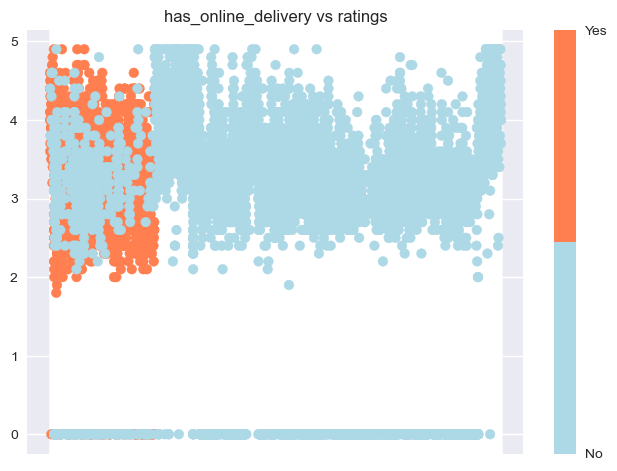

In [408]:
fig, ax = plt.subplots()
sc= ax.scatter(df_combined.restaurant_name, df_combined.aggregate_rating, c=df_combined.has_online_delivery, cmap = mcolors.ListedColormap(["lightblue", "coral"]))
ax.set_xticklabels([])
cbar = fig.colorbar(sc)
cbar.ax.set_yticklabels(['No','','','','','Yes'])
plt.title("has_online_delivery vs ratings")
plt.show()


### Average ratings for restaurants that has_table_booking

In [414]:
#Show avg rating for restaurants with has_table_booking ‘Yes’ or ‘No’
query = """
SELECT f.has_table_booking, AVG(r.aggregate_rating) AS avg_rating
FROM features f
JOIN ratings r ON f.restaurant_id = r.restaurant_id
GROUP BY f.has_table_booking
"""

booking_df = pd.read_sql(query,db)
booking_df

/Users/reema/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,has_table_booking,avg_rating
0,Yes,3.441969
1,No,2.559359


In [415]:
#Plot avg rating for restaurants based on table booking option
query1 = """
SELECT r.restaurant_id, r.restaurant_name, f.has_table_booking, rt.aggregate_rating
FROM restaurant_details r
JOIN ratings rt ON r.restaurant_id = rt.restaurant_id
JOIN features f ON r.restaurant_id = f.restaurant_id
"""

booking_df = pd.read_sql(query1, db)
booking_df

/Users/reema/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,restaurant_id,restaurant_name,has_table_booking,aggregate_rating
0,53,Amber,Yes,2.6
1,55,Berco's,Yes,3.9
2,60,Colonel's Kababz,Yes,3.2
3,64,Diva - The Italian Restaurant,Yes,3.8
4,65,Drums of Heaven,Yes,3.5
...,...,...,...,...
9546,18499493,Zombiez,No,0.0
9547,18500618,Veg. Darbar,No,0.0
9548,18500628,Grill & Cafe,No,0.0
9549,18500639,Chandni Chowk 2 China,No,0.0


In [416]:
#preparing data for plotting
booking_df.loc[booking_df["has_table_booking"] == "Yes", "has_table_booking"] = 1
booking_df.loc[booking_df["has_table_booking"] == "No", "has_table_booking"] = 0

#### Displaying how each restaurant's table booking feature is impacting its rating


/var/folders/15/bnqnhs9d2fl__lnh_m4sqpm40000gn/T/ipykernel_906/1309450220.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['No','','','','','Yes'])


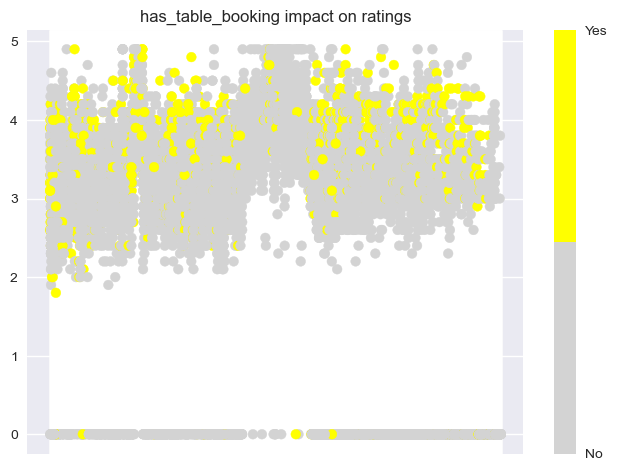

In [417]:
#displaying how has_table_booking is effecting ratings for each restaurant
fig, ax = plt.subplots()
sc= ax.scatter(booking_df.restaurant_name, booking_df.aggregate_rating, c=booking_df.has_table_booking, cmap = mcolors.ListedColormap(["lightgrey", "yellow"]))
ax.set_xticklabels([])
cbar = fig.colorbar(sc)
cbar.ax.set_yticklabels(['No','','','','','Yes'])
plt.title('has_table_booking impact on ratings')
plt.show()


### Top cities that contain most excellent-rated restaurants in each country

In [442]:
# Top cities that has the most excellent-rated restaurants in each country.

query = '''
SELECT *
FROM (
  SELECT c.country, r.city, MAX(ra.aggregate_rating) as max_rating,
         r.latitude, r.longitude,
         ROW_NUMBER() OVER (PARTITION BY c.country ORDER BY MAX(ra.aggregate_rating) DESC) as ranking
  FROM restaurant_details r
  JOIN features f ON r.restaurant_id = f.restaurant_id
  JOIN ratings ra ON r.restaurant_id = ra.restaurant_id
  JOIN country_codes c ON r.country_code = c.country_code
  WHERE ra.aggregate_rating >= 4.5
  GROUP BY c.country, r.city, r.latitude, r.longitude
) AS ranked
WHERE ranking <= 2
ORDER BY country, max_rating DESC

'''

# Read the results into a pandas dataframe
df = pd.read_sql(query, con=db)

# Group the dataframe by country and city
grouped_df = df.groupby(['country', 'city'])['max_rating', 'latitude', 'longitude'].max().reset_index()

# Filter the results to include only the top two cities for each country
grouped_df['ranking'] = grouped_df.groupby('country')['max_rating'].rank(method='dense', ascending=False)
grouped_df = grouped_df[grouped_df['ranking'] <= 2]

map = folium.Map(location=[df['latitude'].iloc[0], df['longitude'].iloc[0]], zoom_start=2, tiles ="Stamen Terrain")

# Define a color scheme for the countries
color_scheme = {'India': 'green', 'United States': 'red', 'United Kingdom': 'blue', 'UAE': 'purple'}

# Add a marker for each restaurant, color-coded by country
for i, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=row['city'] + ', ' + row['country'],
                  icon=folium.Icon(color=color_scheme.get(row['country'], 'lightred'))
                 ).add_to(map)

# Display the map
map

print("This image is named as fig2.png and will be found in the respository.")

/var/folders/15/bnqnhs9d2fl__lnh_m4sqpm40000gn/T/ipykernel_906/1555315647.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby(['country', 'city'])['max_rating', 'latitude', 'longitude'].max().reset_index()


### Most expensive restaurant in each country

In [463]:
#Most Expensive restaurant in each country

query = """
SELECT t1.restaurant_name, t1.city, t1.avg_cost_for_two, t1.currency, c.country
FROM restaurant_details t1
JOIN country_codes c ON t1.country_code = c.country_code
WHERE (
    SELECT MAX(t2.`avg_cost_for_two`)
    FROM restaurant_details t2
    WHERE t2.country_code = t1.country_code
) = t1.`avg_cost_for_two`
ORDER BY c.country;

"""

# Execute the SQL query and store the results in a pandas dataframe
df = pd.read_sql_query(query, db)
df



,restaurant_name,city,avg_cost_for_two,currency,country
0,Pier 70,Paynesville,120,Dollar($),Australia
1,Terra�_o It��lia,S�o Paulo,400,Brazilian Real(R$),Brazil
2,Lake House Restaurant,Vineland Station,70,Dollar($),Canada
3,Orient Express - Taj Palace Hotel,New Delhi,8000,Indian Rupees(Rs.),India
4,Skye,Jakarta,800000,Indonesian Rupiah(IDR),Indonesia
5,Satoo - Hotel Shangri-La,Jakarta,800000,Indonesian Rupiah(IDR),Indonesia
6,Hippopotamus - Museum Hotel,Wellington City,200,NewZealand($),New Zealand
7,Spiral - Sofitel Philippine Plaza Manila,Pasay City,6000,Botswana Pula(P),Phillipines
8,Vine - The St. Regis,Doha,550,Qatari Rial(QR),Qatar
9,Restaurant Andre,Singapore,500,Dollar($),Singapore


### Top rated restaurants in each country

In [457]:
# restaurants above 4.5 aggregate_rating in each country
query = """
SELECT r.restaurant_name, r.city, c.country, r.latitude, r.longitude,ra.aggregate_rating
FROM restaurant_details r
INNER JOIN country_codes c ON r.country_code = c.country_code
INNER JOIN ratings ra ON r.restaurant_id = ra.restaurant_id
WHERE ra.aggregate_rating >= 4.5
ORDER BY c.country;
"""
df = pd.read_sql_query(query, db)


map = folium.Map(location=[df['latitude'].iloc[0], df['longitude'].iloc[0]], zoom_start=2, tiles ="CartoDB Positron")

# Define a color scheme for the countries
color_scheme = {'India': 'green', 'United States': 'red', 'United Kingdom': 'blue', 'Canada': 'purple'}

# Add a marker for each restaurant, color-coded by country
for i, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup='Name: {}<br><br>City: {}<br><br>Rating: {}<br><br>country: {}'.format(row['restaurant_name'], row['city'], row['aggregate_rating'],row['country']),
                  icon=folium.Icon(color=color_scheme.get(row['country'], 'lightred'))
                 ).add_to(map)

# Display the map
map
print("This image is named as fig3.png and will be found in the respository.")